<a href="https://colab.research.google.com/github/krsmith/DS-Unit-2-Sprint-4-Model-Validation/blob/master/module-2-validate-classification-problems/LS_DS_242_Validate_classification_problems_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


def train_validation_test_split(
    X, y, train_size=0.75, val_size=0.15, test_size=0.1, #Changed the train set to .75 and val to .15
    random_state=None, shuffle=True):
        
    assert train_size + val_size + test_size == 1
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=val_size/(train_size+val_size), 
        random_state=random_state, shuffle=shuffle)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2019-01-29 21:41:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/zip]
Saving to: ‘bank-additional.zip.1’

bank-additional.zip 100%[===================>] 434.15K   605KB/s    in 0.7s    

2019-01-29 21:41:08 (605 KB/s) - ‘bank-additional.zip.1’ saved [444572/444572]



In [2]:
!unzip bank-additional.zip

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/.DS_Store  
replace __MACOSX/bank-additional/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/bank-additional/._.DS_Store  
replace bank-additional/.Rhistory? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/.Rhistory  
replace bank-additional/bank-additional-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/bank-additional-full.csv  
replace bank-additional/bank-additional-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/bank-additional-names.txt  
replace bank-additional/bank-additional.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-additional/bank-additional.csv  
replace __MACOSX/._bank-additional? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._bank-additional  


In [3]:
%cd bank-additional

/content/bank-additional


In [0]:
import pandas as pd

bank = pd.read_csv('bank-additional-full.csv', sep=';')

X = bank.drop(columns='y')
y = bank['y'] == 'yes'

In [0]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(
    X, y, shuffle=False)

In [0]:
import numpy as np

majority_class = y_train.mode()[0]
y_pred = np.full(shape=y_val.shape, fill_value=majority_class)

In [42]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred) #Score with .8 train, .1 val, .1, test was .843

0.8760317203430976

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

#When AUC is approximately 0.5, model has no discrimination 
#capacity to distinguish between positive class and negative class.

0.5

In [45]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.88      1.00      0.93      5413
        True       0.00      0.00      0.00       766

   micro avg       0.88      0.88      0.88      6179
   macro avg       0.44      0.50      0.47      6179
weighted avg       0.77      0.88      0.82      6179



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
!pip install category_encoders

In [46]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(solver='lbfgs')
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [47]:
accuracy_score(y_val, y_pred) #getting even higher

0.8897879915843988

In [48]:
roc_auc_score(y_val, y_pred) 

#ROCAUC is also higher, which means there is a 66% change that the model
#will be able to distinguish between positive and negative class

0.6630743172683112

In [49]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.91      0.96      0.94      5413
        True       0.59      0.36      0.45       766

   micro avg       0.89      0.89      0.89      6179
   macro avg       0.75      0.66      0.69      6179
weighted avg       0.87      0.89      0.88      6179



In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[5221,  192],
       [ 489,  277]])

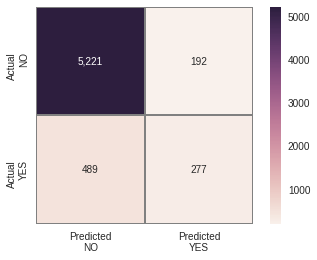

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_viz(y_true, y_pred):
  matrix = confusion_matrix(y_true, y_pred)
  return sns.heatmap(matrix, annot=True, fmt=',', linewidths=1,
                    linecolor='grey', square=True, xticklabels=['Predicted\nNO', 'Predicted\nYES'],
                    yticklabels=['Actual\nNO','Actual\nYES'])

confusion_viz(y_val, y_pred);

In [52]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(solver='lbfgs', class_weight ='balanced')
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [53]:
accuracy_score(y_val, y_pred) #MUCH lower with the balanced weight

0.7023790257323191

In [54]:
roc_auc_score(y_val, y_pred)

#But ROCAUC is the highest here with a 78% chance of being able to 
#distinguish classes.

0.7830599769725624

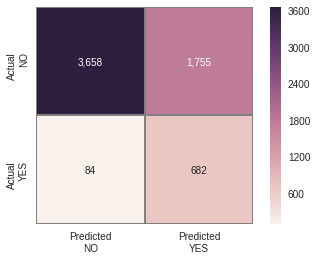

In [55]:
confusion_viz(y_val, y_pred); #Definitely more false positives